In [800]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [334]:
def remove_L(x):
    for i in range(len(x)):
        x.values[i] = str(x.values[i])
        x.values[i] = x.values[i].split('L')[0]
    return x
def data_preprocess1(month):
    """
    handle data from month 1 to month 5
    """
    table2cols = ['pH', '溶解氧', '高锰酸盐指数', '生化需氧量', '氨氮', '石油类', '挥发酚', '汞', '铅', '化学需氧量',
       '总磷', '铜', '锌', '氟化物', '硒', '砷', '镉', '六价铬', '氰化物', '阴离子表面活性剂', '硫化物']
    data = pd.read_excel("第12题附件/"+str(month)+".xlsx", names=['a','b','c','d','e','f','g','h'])
    data.drop([0, 1, 2, 3, 18, 25, 26, 28, 29, 30, 31, 32, 33], axis=0, inplace=True)
    data.drop(['a','c'], axis=1, inplace=True)
    data = data.reset_index().drop('index', axis=1)
    colnames = data['b'].values
    colnames1 = []
    for col in colnames:
        if '（' in col:
            colnames1.append(col.split('（')[0]+'1')
        elif '(' in col:
            colnames1.append(col.split('(')[0]+'1')
        else:
            colnames1.append(col+'1')
    data = data.drop('b', axis=1)
    temp = pd.DataFrame(data.T.values, columns=colnames1)
    temp = temp.apply(lambda x:remove_L(x))
    for col in table2cols:
        temp[col] = temp[col+'1']
    temp.drop(colnames1, axis=1, inplace=True)
    for col in temp.columns:
        temp[col] = temp[col].astype(np.float64)
    temp.drop('pH', axis=1, inplace=True)
    return temp

In [335]:
def data_preprocess2(month):
    """
    handle data from month 6 to month 8
    """
    data = pd.read_excel("第12题附件/"+str(month)+".xlsx", names=[str(i) for i in range(39)])
    data = data.drop([str(i) for i in range(15, 39)], axis=1)
    data1 = data.iloc[0:7]
    data2 = data.iloc[9:16]
    colnames1 = list(data.iloc[0])
    colnames2 = list(data.iloc[9])
    data1 = data1.drop(['0','1','2','3','4','6'], axis=1)
    data1 = data1.drop([0,1], axis=0)
    data2 = data2.drop([9, 10], axis=0)
    data2 = data2.drop(['1', '13', '14'], axis=1)
    data1 = data1.reset_index().drop('index', axis=1)
    data2 = data2.reset_index().drop('index', axis=1)
    data = pd.concat([data1, data2], axis=1)
    colnames = [colnames1[5]]+colnames1[7:]+[colnames2[0]]+colnames2[2:13]
    colnames1 = [col.split(' ')[0] for col in colnames]
    data.columns = colnames1
    data = data.apply(lambda x:remove_L(x))
    for col in data.columns:
        data[col] = data[col].astype(np.float64)
    data.drop('pH', axis=1, inplace=True)
    return data

In [379]:
def data_preprocess3():
    """
    handle GB
    """
    data = pd.read_excel("国标.xlsx", names=['ord','feature','Ⅰ类','Ⅱ类','Ⅲ类','Ⅳ类','Ⅴ类'])
    data.drop('ord', axis=1, inplace=True)
    data.drop([0, 8, 23], axis=0, inplace=True)
    data = data.reset_index().drop('index', axis=1)
    data['Ⅰ类'][1] = 7.5
    data.drop([0], axis=0, inplace=True)
    data = data.reset_index().drop('index', axis=1)
    for col in data.columns[1:]:
        data[col] = data[col].astype(np.float64)
    return data

In [484]:
gbdata = data_preprocess3()
gbdata

c:\users\glaucous\anaconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,feature,Ⅰ类,Ⅱ类,Ⅲ类,Ⅳ类,Ⅴ类
0,溶解氧,7.50000,6.00000,5.0000,3.000,2.000
1,高锰酸盐指数,2.00000,4.00000,6.0000,10.000,15.000
2,化学需氧量,15.00000,15.00000,20.0000,30.000,40.000
3,生化需氧量,3.00000,3.00000,34.0000,6.000,10.000
4,氨氮,0.15000,0.50000,1.0000,1.500,2.000
5,总磷,0.02000,0.10000,0.2000,0.300,0.400
6,铜,0.10000,1.00000,1.0000,1.000,1.000
7,锌,0.05000,1.00000,1.0000,2.000,2.000
8,氟化物,1.00000,1.00000,1.0000,1.500,1.500
9,硒,0.01000,0.01000,0.0100,0.020,0.020


In [366]:
def merge_df():
    df_list = []
    df = data_preprocess1(1)
    for i in range(2,9):
        if i < 6:
            df = pd.concat([df, data_preprocess1(i)])
        else:
            df = pd.concat([df, data_preprocess2(i)])
    df = df[df['溶解氧'] != -1]
    df = df.reset_index().drop('index', axis=1)
    return df

In [367]:
total_df = merge_df()

In [485]:
def compute_gbstd(df, gbdata):
    roma=['Ⅰ类','Ⅱ类','Ⅲ类','Ⅳ类','Ⅴ类']
    ms = np.zeros((1, len(df.index)))

    for idx, col in enumerate(df.index):
        if col not in ['溶解氧']:
            if df[col] < np.float64(gbdata[gbdata['feature'] == col][roma[0]]):
                ms[0, idx] = 1
            elif df[col] > np.float64(gbdata[gbdata['feature'] == col][roma[-1]]):
                ms[0, idx] = 5
            else:
                for i in range(5):
                    if df[col] < np.float64(gbdata[gbdata['feature'] == col][roma[i]]):
                        ms[0, idx] = i+1
                        break
        else:
            if df[col] > np.float64(gbdata[gbdata['feature'] == col][roma[0]]):
                ms[0, idx] = 1
            elif df[col] < np.float64(gbdata[gbdata['feature'] == col][roma[-1]]):
                ms[0, idx] = 5
            else:
                for i in range(5):
                    if df[col] > np.float64(gbdata[gbdata['feature'] == col][roma[i]]):
                        ms[0, idx] = i+1
                        break
    return max(max(ms))

In [486]:
membership1 = [compute_gbstd(total_df.iloc[i], gbdata) for i in range(len(total_df))]

In [494]:
result = pd.DataFrame({'membership':membership1,'rank':membership})

In [496]:
result.to_excel("problem1result.xlsx", index=False)

In [470]:
def compute_membership(df, gbdata):
    roma=['Ⅰ类','Ⅱ类','Ⅲ类','Ⅳ类','Ⅴ类']
    ms = np.zeros((len(df.index), 5))
    ms1 = np.zeros((1, len(df.index)))
    ms2 = np.zeros((1, len(df.index)))
    for idx, col in enumerate(df.index):
        ms1[0, idx] = sum(sum(gbdata[gbdata['feature'] == col][roma[:-4]].values))/len(df.index)
    for idx, col in enumerate(df.index):
        if col not in ['溶解氧']:
            if df[col] < np.float64(gbdata[gbdata['feature'] == col][roma[0]]):
                ms[idx, 0] = 1
            elif df[col] > np.float64(gbdata[gbdata['feature'] == col][roma[-1]]):
                ms[idx, -1] = 1
            else:
                for i in range(5):
                    if df[col] < np.float64(gbdata[gbdata['feature'] == col][roma[i]]):
                        ms[idx, i-1] = (df[col] - gbdata[gbdata['feature'] == col][roma[i-1]])/(gbdata[gbdata['feature'] == col][roma[i]]-gbdata[gbdata['feature'] == col][roma[i-1]])
                        ms[idx, i] = (gbdata[gbdata['feature'] == col][roma[i]] - df[col])/(gbdata[gbdata['feature'] == col][roma[i]]-gbdata[gbdata['feature'] == col][roma[i-1]])
                        break
        else:
            if df[col] > np.float64(gbdata[gbdata['feature'] == col][roma[0]]):
                ms[idx, 0] = 1
            elif df[col] < np.float64(gbdata[gbdata['feature'] == col][roma[-1]]):
                ms[idx, -1] = 1
            else:
                for i in range(5):
                    if df[col] > np.float64(gbdata[gbdata['feature'] == col][roma[i]]):
                        ms[idx, i-1] = (gbdata[gbdata['feature'] == col][roma[i]] - df[col])/(gbdata[gbdata['feature'] == col][roma[i]]-gbdata[gbdata['feature'] == col][roma[i-1]])
                        ms[idx, i] = (df[col] - gbdata[gbdata['feature'] == col][roma[i-1]])/(gbdata[gbdata['feature'] == col][roma[i]]-gbdata[gbdata['feature'] == col][roma[i-1]])
                        break
        ms2[0, idx] = df[col]**3/ms1[0, idx]**3
    ms2 = ms2/ms2.sum()
    print(ms2)
    return np.argmax(np.dot(ms2, ms))+1

In [471]:
membership = [compute_membership(total_df.iloc[i], gbdata) for i in range(len(total_df))]

[[3.34449670e-04 1.52615292e-03 5.46561479e-04 8.05413815e-01
  1.00347032e-06 4.23339040e-07 6.42221003e-05 1.56792237e-05
  5.80711989e-04 1.90769115e-01 1.25433790e-07 1.25433790e-04
  8.54796155e-05 8.02776254e-09 9.29313861e-09 1.25433790e-04
  3.44190319e-04 6.42221003e-05 1.95990296e-06 1.00347032e-06]]
[[2.13651104e-04 1.68318073e-03 5.28049396e-04 6.82065226e-01
  7.66126866e-07 3.23209772e-07 4.90321194e-05 1.19707323e-05
  7.66126866e-04 3.13610118e-01 9.57658583e-08 9.57658583e-05
  3.14599463e-05 6.12901493e-09 1.19707323e-08 7.66126866e-04
  1.27464357e-04 4.90321194e-05 1.49634154e-06 9.57658583e-08]]
[[3.65960435e-04 6.46198059e-04 5.66842144e-04 8.90514543e-01
  6.97191047e-07 2.94127473e-07 4.46202270e-05 1.08936101e-05
  2.06575125e-04 1.06761127e-01 8.71488809e-08 8.71488809e-05
  2.86291917e-05 5.57752838e-09 2.35301979e-09 8.71488809e-05
  5.97754174e-04 4.46202270e-05 3.67659341e-05 8.71488809e-08]]
[[6.99751901e-02 1.86436134e-03 3.10376428e-03 6.90504199e-02
  

[[7.31619495e-02 2.03457112e-01 6.02835888e-02 1.97081854e-02
  1.42894433e-04 6.02835888e-05 9.14524369e-03 2.23272551e-03
  9.30189833e-02 5.44539425e-02 1.78618041e-05 3.13939069e-01
  1.58029811e-02 1.14315546e-06 4.68236477e-06 1.42894433e-01
  2.23272551e-03 9.14524369e-03 2.79090689e-04 1.78618041e-05]]
[[7.03947464e-03 7.03947464e-03 1.02473893e-02 6.21371820e-02
  5.63157971e-05 2.37582269e-05 3.60421102e-03 8.79934330e-04
  3.25901604e-02 8.53799401e-01 7.03947464e-06 7.03947464e-03
  4.32311737e-03 4.50526377e-07 1.37348598e-06 7.03947464e-03
  4.50526377e-04 3.60421102e-03 1.09991791e-04 7.03947464e-06]]
[[4.23485895e-02 9.86804911e-02 2.68034158e-02 9.04615282e-02
  1.47301491e-04 6.21428165e-05 9.42729543e-03 2.30158580e-03
  3.18171221e-02 6.32073000e-01 1.84126864e-05 1.84126864e-02
  1.29803731e-02 1.17841193e-06 3.23356233e-06 1.84126864e-02
  6.31555143e-03 9.42729543e-03 2.87698225e-04 1.84126864e-05]]
[[3.28365129e-02 1.12314107e-01 8.90670324e-03 7.51233034e-03
  

(array([10.,  0.,  4.,  0.,  0., 10.,  0.,  5.,  0.,  9.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

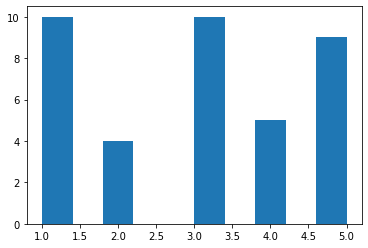

In [476]:
plt.hist(membership)

In [474]:
total_df.to_excel("total_df.xlsx", index=False)

In [650]:
total_df.columns

Index(['溶解氧', '高锰酸盐指数', '生化需氧量', '氨氮', '石油类', '挥发酚', '汞', '铅', '化学需氧量', '总磷',
       '铜', '锌', '氟化物', '硒', '砷', '镉', '六价铬', '氰化物', '阴离子表面活性剂', '硫化物'],
      dtype='object')

In [319]:
def WPI(feature,val):
    #total_interval=gbdata.loc[feature,'Ⅴ']-gbdata.loc[feature,'Ⅰ']
    wpi_l=0#从最低的wpi值=0开始计算，一次一次往上加
    roma=[0,'Ⅰ类','Ⅱ类','Ⅲ类','Ⅳ类','Ⅴ类']
    for i in range(1,6):
        # gbdata[roma[i]][feature]
        if val < gbdata.loc[feature,roma[i]]:
            break#小于后面的一个值，已经判断好区间可以输出了
        else:
            wpi_l=wpi_l+20
    
    #i表示feature的val所属于的类型（3，5小于4就是属于Ⅳ类，i=4）
    if val > gbdata.loc[feature,'Ⅴ类']:
        WPI_index = 100+(val-gbdata.loc[feature,'Ⅴ类'])/gbdata.loc[feature,'Ⅴ类']*40
    elif val > gbdata.loc[feature,'Ⅰ类']:
        WPI_index = wpi_l+20/(gbdata.loc[feature,roma[i]]-gbdata.loc[feature,roma[i-1]])*(val-gbdata.loc[feature,roma[i-1]])
    else:
        WPI_index=20
    return WPI_index

In [327]:
WPI(3,20)

60.0

In [329]:
gbdata1 = gbdata.set_index('feature')
gbdata1.head()

,Ⅰ类,Ⅱ类,Ⅲ类,Ⅳ类,Ⅴ类
feature,,,,,
pH,6~9,NaN,NaN,NaN,NaN
溶解氧,7.5,6.0,5.0,3.0,2.0
高锰酸盐指数,2,4.0,6.0,10.0,15.0
化学需氧量,15,15.0,20.0,30.0,40.0
生化需氧量,3,3.0,34.0,6.0,10.0


In [618]:
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size' : 20,
}

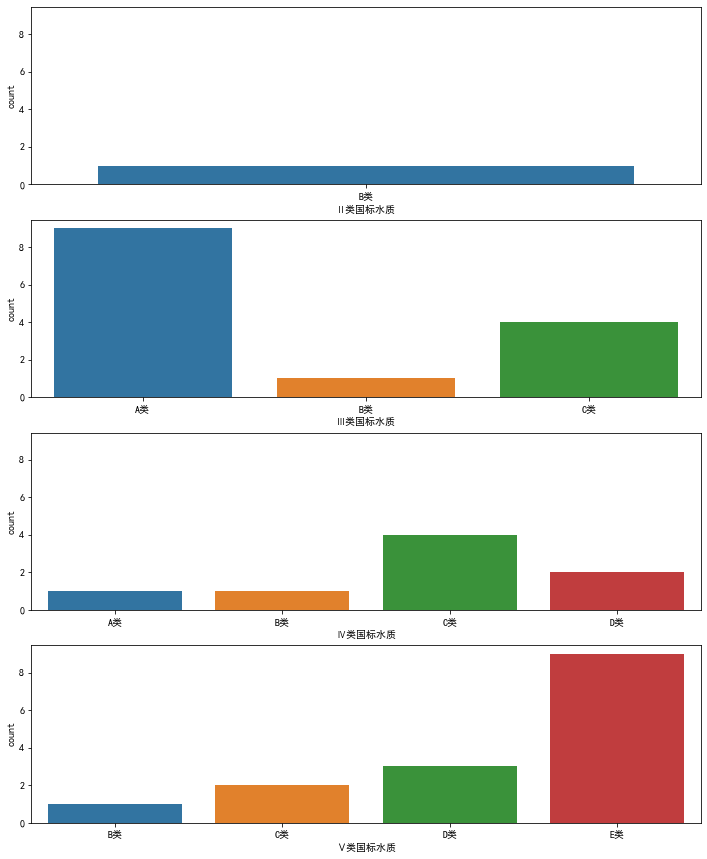

In [584]:
gpresult = result.groupby(['membership'])
f, axes = plt.subplots(4, 1, figsize=(12, 15), sharey=True)
gx = fig.add_gridspec(4, 1)
for (idx), (key, group) in enumerate(gpresult):
    if idx == 0:
        h = sns.countplot(group['rank'], ax=axes[idx])
        h.set_xlabel(" ", font2)
        h.set_xticklabels(['B类'])
        h.set_xlabel("Ⅱ类国标水质")
    if idx == 1:
        h = sns.countplot(group['rank'], ax=axes[idx])
        h.set_xlabel(" ", font2)
        h.set_xticklabels(['A类', 'B类','C类'])
        h.set_xlabel("Ⅲ类国标水质")
    if idx == 2:
        h = sns.countplot(group['rank'], ax=axes[idx])
        h.set_xlabel(" ", font2)
        h.set_xticklabels(['A类', 'B类','C类','D类'])
        h.set_xlabel("Ⅳ类国标水质")
    if idx == 3:
        h = sns.countplot(group['rank'], ax=axes[idx])
        h.set_xlabel("综合水质评价等级", font2)
        h.set_xticklabels(['B类','C类','D类','E类'])
        h.set_xlabel("Ⅴ类国标水质")
plt.savefig("第一问图1.png", dpi=300)

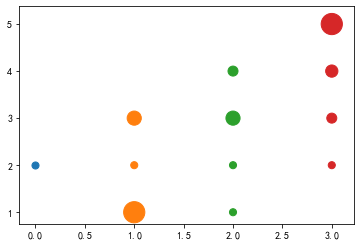

In [602]:
gpresult = result.groupby(['membership'])
for (idx), (key, group) in enumerate(gpresult):
    gp = group.groupby('rank').count()
    plt.scatter([idx for i in range(len(gp.index))], gp.index, s=50*gp.membership)

In [603]:
result.head()

,membership,rank
0,5.0,5
1,5.0,5
2,5.0,5
3,3.0,1
4,2.0,2


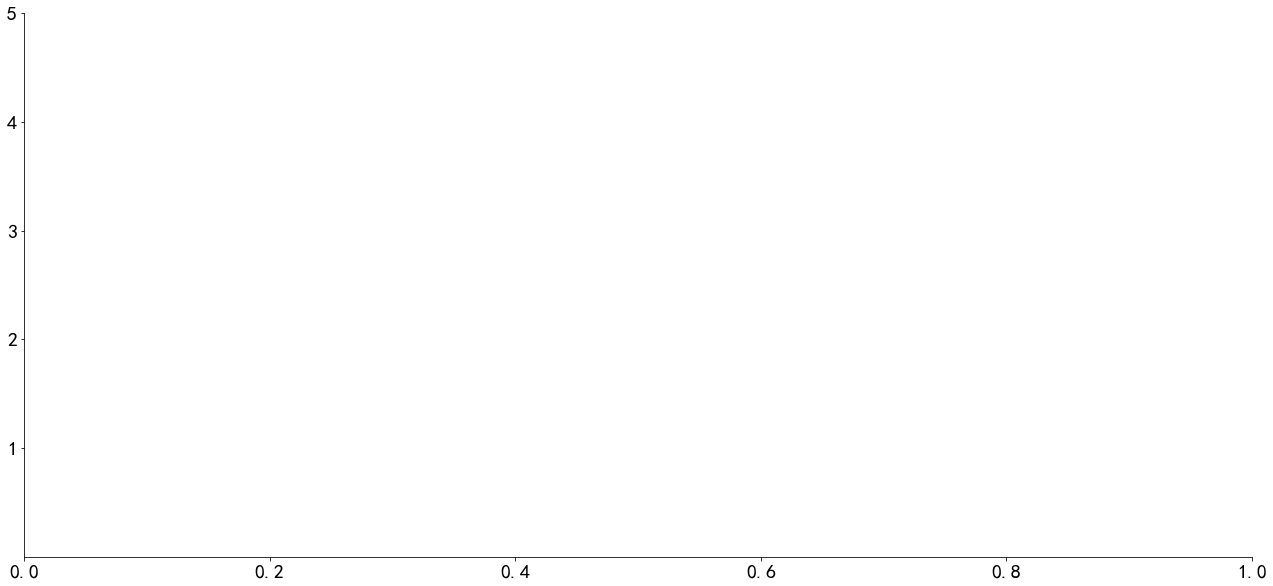

In [647]:
fig = plt.figure(figsize=(22, 10))
ax = fig.add_subplot()
h = sns.stripplot(x="membership", y="rank", data=result, size=15, ax=ax1)
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
plt.xticks(fontsize=20)
plt.yticks([1,2,3,4,5],fontsize=20)
h.set_xticklabels(['Ⅱ类','Ⅲ类','Ⅳ类','Ⅴ类'])
h.set_yticklabels(['A','B','C','D','E'])
h.set_ylabel("好坏程度", font2)
h.set_xlabel("隶属水质", font2)

plt.savefig("水质分布图.png", dpi=300)

In [666]:
ls = pd.read_excel("ls.xlsx", header=None, names=total_df.columns)
for col in ls.columns:
    if ls.iloc[0][col] == 0:
        ls.drop(col, axis=1, inplace=True)
ls.head()

,生化需氧量,氨氮,铜,砷,六价铬,硫化物
0,1.327204,2.630142,-1.502938,1.327204,1.327204,-1.690806


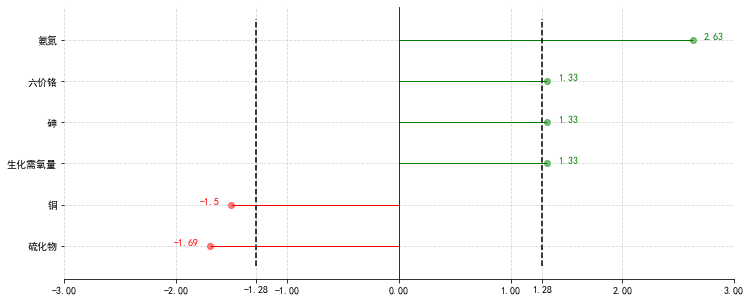

In [686]:
df = pd.DataFrame({'feature':ls.columns, 'val':ls.iloc[0]})
df.set_index('feature', inplace=True)
df.sort_values('val', inplace=True)
colors = ["red" if x < 0 else "green" for x in df["val"]]
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.hlines(y = df.index, xmin = 0 , xmax = df["val"],  color = colors, linewidth = 1)
for x, y in zip(df["val"], df.index):
    # annotate text
    ax.text(x - 0.1 if x < 0 else x + 0.1, 
             y, 
             round(x, 2), 
             color = "red" if x < 0 else "green",  
             horizontalalignment='right' if x < 0 else 'left', 
             size = 10)
    # plot the points
    ax.scatter(x, 
                y, 
                color = "red" if x < 0 else "green", 
                alpha = 0.5)
ax.vlines(x=1.28, ymin=-0.5, ymax=5.5, linestyle='--')
ax.vlines(x=-1.28, ymin=-0.5, ymax=5.5, linestyle='--')
ax.set_yticks(df.index)
ax.set_xlim(-3, 3)
plt.xticks([-3,-2,-1.28,-1,0,1,1.28,2,3])
ax.grid(linestyle='--', alpha=0.5)
# change the spines to make it nicer
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")

# with this line, we change the right spine to be in the middle
# as a vertical line from the origin
ax.spines['right'].set_position(('data',0))
ax.spines['right'].set_color('black')
plt.savefig("mk检验程度.png", dpi=300)

In [687]:
data3 = pd.read_excel("第三问得分.xlsx", header=None)
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,2.231876,2.137685,2.329781,3.574317,3.410205,3.051511,2.330664,2.933338,3.452619,3.307502,...,2.921222,2.351724,2.797785,2.818519,2.839983,2.183836,2.796999,2.938506,2.880777,3.085028


In [690]:
temp1 = data3[data3.columns[:30]].values
temp2 = data3[data3.columns[30:]].values

In [693]:
temp1 = np.reshape(temp1, (5,6))
temp2 = np.reshape(temp2, (4,2))

In [695]:
data1 = pd.DataFrame({'1':temp1[:, 0], '2':temp1[:,1], '3':temp1[:,2], '4':temp1[:,3], '5':temp1[:,4],'6':temp1[:,5]})
data2 = pd.DataFrame({'7':temp2[:, 0], '8':temp2[:,1]})

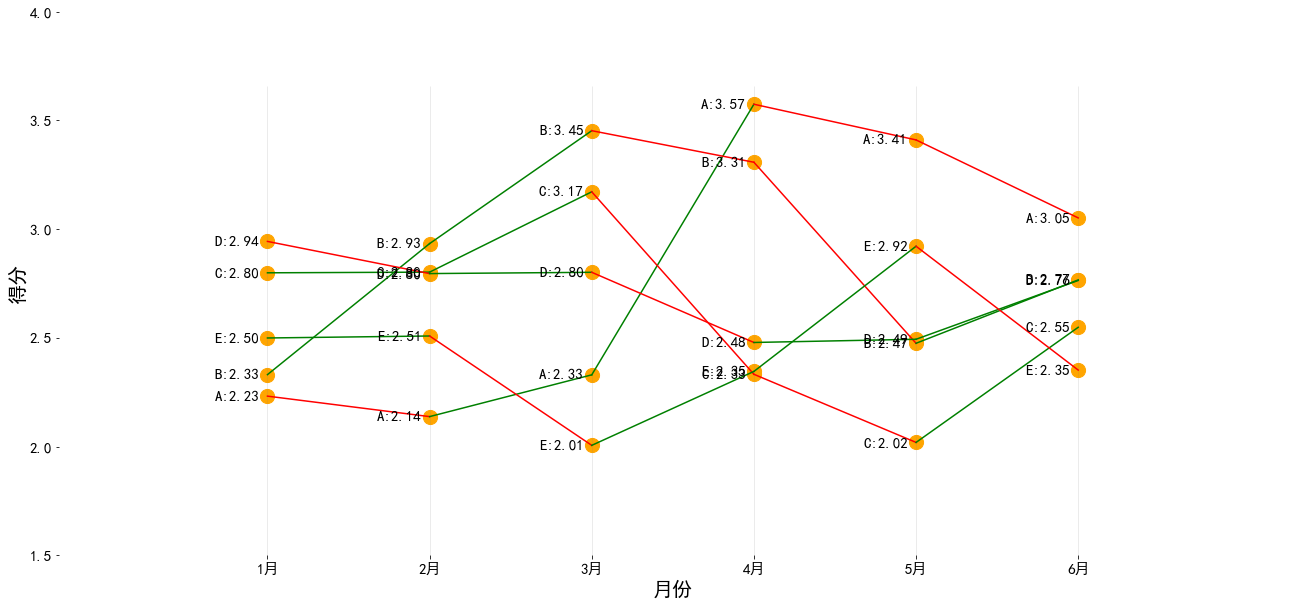

In [744]:
data1.index = ['A','B','C','D','E']
# instanciate the figure
fig = plt.figure(figsize = (22, 10))
ax = fig.add_subplot()

data1["color1"] = data1.apply(lambda row: "green" if row["2"] >= row["1"] else "red", axis = 1)
data1["color2"] = data1.apply(lambda row: "green" if row["3"] >= row["2"] else "red", axis = 1)
data1["color3"] = data1.apply(lambda row: "green" if row["4"] >= row["3"] else "red", axis = 1)
data1["color4"] = data1.apply(lambda row: "green" if row["5"] >= row["4"] else "red", axis = 1)
data1["color5"] = data1.apply(lambda row: "green" if row["6"] >= row["5"] else "red", axis = 1)
# ----------------------------------------------------------------------------------------------------
# plot the data
for cont in data1.index:
    x1 = '1'
    y1 = data1['1'][cont]
    x2 = '2'
    y2 = data1['2'][cont]
    x3 = '3'
    y3 = data1['3'][cont]
    x4 = '4'
    y4 = data1['4'][cont]
    x5 = '5'
    y5 = data1['5'][cont]
    x6 = '6'
    y6 = data1['6'][cont]

    # df["color"] = df.apply(lambda row: "green" if row["1957"] >= row["1952"] else "red", axis = 1)
    # color = df[df["continent"] == cont]["color"]
    color1 = data1[data1.index == cont]["color1"]
    color2 = data1[data1.index == cont]["color2"]
    color3 = data1[data1.index == cont]["color3"]
    color4 = data1[data1.index == cont]["color4"]
    color5 = data1[data1.index == cont]["color5"]
    
    ax.scatter(x1, y1, c="orange", s=200)
    ax.scatter(x2, y2, c="orange", s=200)
    ax.scatter(x3, y3, c="orange", s=200)
    ax.scatter(x4, y4, c="orange", s=200)
    ax.scatter(x5, y5, c="orange", s=200)
    ax.scatter(x6, y6, c="orange", s=200)
    # connect the starting point and the ending point with a line
    # check the bouns section for more
    ax.plot([x1,x2],[float(y1),float(y2)], linestyle="-", color = color1.values[0])
    ax.plot([x2,x3],[float(y2),float(y3)], linestyle="-", color = color2.values[0])
    ax.plot([x3,x4],[float(y3),float(y4)], linestyle="-", color = color3.values[0])
    ax.plot([x4,x5],[float(y4),float(y5)], linestyle="-", color = color4.values[0])
    ax.plot([x5,x6],[float(y5),float(y6)], linestyle="-", color = color5.values[0])
#     if cont == 1:
#         ax.text(0 - 0.05, y1-0.1, r'{}:{:.2f}'.format('A', y1), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(1 - 0.05, y2-0.1, r'{}:{:.2f}'.format('B', y2), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(2 - 0.05, y3-0.1, r'{}:{:.2f}'.format('C', y3), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(3 - 0.05, y4-0.1, r'{}:{:.2f}'.format('D', y4), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(4 - 0.05, y5-0.1, r'{}:{:.2f}'.format('E', y5), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#     else:
    ax.text(0 - 0.05, y1, r'{}:{:.2f}'.format(cont, y1), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(1 - 0.05, y2, r'{}:{:.2f}'.format(cont, y2), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(2 - 0.05, y3, r'{}:{:.2f}'.format(cont, y3), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(3 - 0.05, y4, r'{}:{:.2f}'.format(cont, y4), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(4 - 0.05, y5, r'{}:{:.2f}'.format(cont, y5), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(5 - 0.05, y6, r'{}:{:.2f}'.format(cont, y6), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    # annotate the value for each continent
    # ax.text(ax.get_xlim()[0] - 0.05, y_start, r'{}:{}k'.format(cont, int(y_start)/1000), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':8})
    # ax.text(ax.get_xlim()[1] + 0.05, y_finish, r'{}:{}k'.format(cont, int(y_finish)/1000), horizontalalignment = 'left', verticalalignment = 'center', fontdict = {'size':8})

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the x and y limits
x_lims = ax.get_xlim()
y_lims = ax.get_ylim()

# change the x and y limits programmaticaly
ax.set_xlim(x_lims[0] - 1, x_lims[1] + 1);
ax.set_ylim(1.5, 4)
# add 2 vertical lines
ax.vlines(x1, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x2, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x3, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x4, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x5, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x6, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.set_xticklabels(['1月','2月','3月','4月','5月','6月'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("月份", font2)
plt.ylabel("得分", font2)
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")
plt.savefig("第三问16月得分图.png", dpi=300)

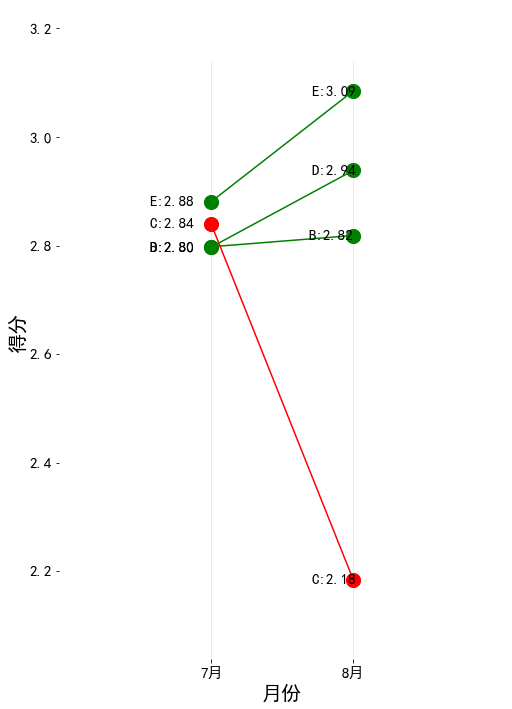

In [752]:
data2.index = ['B','C','D','E']
# instanciate the figure
fig = plt.figure(figsize = (8, 12))
ax = fig.add_subplot()

data2["color1"] = data2.apply(lambda row: "green" if row["8"] >= row["7"] else "red", axis = 1)
# ----------------------------------------------------------------------------------------------------
# plot the data
for cont in data2.index:
    x1 = '7'
    y1 = data2['7'][cont]
    x2 = '8'
    y2 = data2['8'][cont]
    # df["color"] = df.apply(lambda row: "green" if row["1957"] >= row["1952"] else "red", axis = 1)
    # color = df[df["continent"] == cont]["color"]
    color1 = data2[data2.index == cont]["color1"]
    
    ax.scatter(x1, y1, s=200, color=color1)
    ax.scatter(x2, y2, s=200, color=color1)
    # connect the starting point and the ending point with a line
    # check the bouns section for more
    ax.plot([x1,x2],[float(y1),float(y2)], linestyle="-", color = color1.values[0])
#     if cont == 1:
#         ax.text(0 - 0.05, y1-0.1, r'{}:{:.2f}'.format('A', y1), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(1 - 0.05, y2-0.1, r'{}:{:.2f}'.format('B', y2), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(2 - 0.05, y3-0.1, r'{}:{:.2f}'.format('C', y3), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(3 - 0.05, y4-0.1, r'{}:{:.2f}'.format('D', y4), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(4 - 0.05, y5-0.1, r'{}:{:.2f}'.format('E', y5), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#     else:
    ax.text(ax.get_xlim()[0] - 0.05, y1, r'{}:{:.2f}'.format(cont, y1), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(ax.get_xlim()[1] - 0.05, y2, r'{}:{:.2f}'.format(cont, y2), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    # annotate the value for each continent
    # ax.text(ax.get_xlim()[0] - 0.05, y_start, r'{}:{}k'.format(cont, int(y_start)/1000), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':8})
    # ax.text(ax.get_xlim()[1] + 0.05, y_finish, r'{}:{}k'.format(cont, int(y_finish)/1000), horizontalalignment = 'left', verticalalignment = 'center', fontdict = {'size':8})

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the x and y limits
x_lims = ax.get_xlim()
y_lims = ax.get_ylim()

# change the x and y limits programmaticaly
ax.set_xlim(x_lims[0] - 1, x_lims[1] + 1);
ax.set_ylim(y_lims[0]-0.1, y_lims[1]+0.1)
# add 2 vertical lines
ax.vlines(x1, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x2, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.set_xticklabels(['7月','8月'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("月份", font2)
plt.ylabel("得分", font2)
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")
plt.savefig("第三问78月得分图.png", dpi=300)

In [ ]:
# instanciate the figure
fig = plt.figure(figsize = (22, 10))
ax = fig.add_subplot()

data2["color1"] = data2.apply(lambda row: "green" if row["2"] >= row["1"] else "red", axis = 1)
# ----------------------------------------------------------------------------------------------------
# plot the data
for cont in data2.index:
    x1 = ''
    y1 = data2['1'][cont]
    x2 = '2'
    y2 = data1['2'][cont]

    # df["color"] = df.apply(lambda row: "green" if row["1957"] >= row["1952"] else "red", axis = 1)
    # color = df[df["continent"] == cont]["color"]
    color1 = data1[data1.index == cont]["color1"]
    
    ax.scatter(x1, y1, c="orange", s=200)
    ax.scatter(x2, y2, c="orange", s=200)
    ax.scatter(x3, y3, c="orange", s=200)
    ax.scatter(x4, y4, c="orange", s=200)
    ax.scatter(x5, y5, c="orange", s=200)
    
    # connect the starting point and the ending point with a line
    # check the bouns section for more
    ax.plot([x1,x2],[float(y1),float(y2)], linestyle="-", color = color1.values[0])
    ax.plot([x2,x3],[float(y2),float(y3)], linestyle="-", color = color2.values[0])
    ax.plot([x3,x4],[float(y3),float(y4)], linestyle="-", color = color3.values[0])
    ax.plot([x4,x5],[float(y4),float(y5)], linestyle="-", color = color4.values[0])
#     if cont == 1:
#         ax.text(0 - 0.05, y1-0.1, r'{}:{:.2f}'.format('A', y1), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(1 - 0.05, y2-0.1, r'{}:{:.2f}'.format('B', y2), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(2 - 0.05, y3-0.1, r'{}:{:.2f}'.format('C', y3), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(3 - 0.05, y4-0.1, r'{}:{:.2f}'.format('D', y4), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#         ax.text(4 - 0.05, y5-0.1, r'{}:{:.2f}'.format('E', y5), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
#     else:
    ax.text(0 - 0.05, y1, r'{}:{:.2f}'.format('A', y1), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(1 - 0.05, y2, r'{}:{:.2f}'.format('B', y2), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(2 - 0.05, y3, r'{}:{:.2f}'.format('C', y3), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(3 - 0.05, y4, r'{}:{:.2f}'.format('D', y4), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    ax.text(4 - 0.05, y5, r'{}:{:.2f}'.format('E', y5), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':15})
    # annotate the value for each continent
    # ax.text(ax.get_xlim()[0] - 0.05, y_start, r'{}:{}k'.format(cont, int(y_start)/1000), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':8})
    # ax.text(ax.get_xlim()[1] + 0.05, y_finish, r'{}:{}k'.format(cont, int(y_finish)/1000), horizontalalignment = 'left', verticalalignment = 'center', fontdict = {'size':8})

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the x and y limits
x_lims = ax.get_xlim()
y_lims = ax.get_ylim()

# change the x and y limits programmaticaly
ax.set_xlim(x_lims[0] - 1, x_lims[1] + 1);
ax.set_ylim(1.5, 4)
# add 2 vertical lines
ax.vlines(x1, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x2, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x3, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x4, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x5, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.set_xticklabels(['1月','2月','3月','4月','5月'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")
plt.savefig("第三问16月得分图.png", dpi=300)

In [765]:
timing = pd.read_excel("时间系数.xlsx", header=None, names=total_df.columns[:6])
timing.drop(['生化需氧量','氨氮','石油类','挥发酚'], axis=1, inplace=True)

In [766]:
timing

,溶解氧,高锰酸盐指数
0,1.774932,-3.346221
1,-1.694067,0.596557
2,2.184620,0.769160
3,6.010957,-1.361684
4,3.133891,-0.212172
5,-0.791382,-1.877734


In [774]:
font1 = {'family' : 'SimHei',
'weight' : 'normal',
'size' : 15,
}

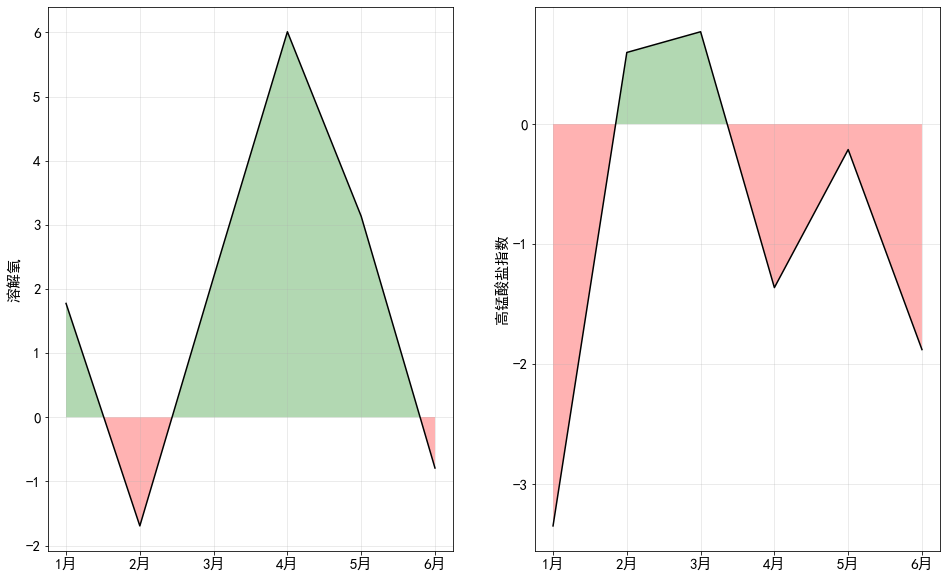

In [782]:
fig = plt.figure(figsize=(16, 10))
gx = fig.add_gridspec(1,2)
for idx, col in enumerate(timing.columns):
    ax = fig.add_subplot(gx[0, idx])
    h = sns.lineplot(['1月','2月','3月','4月','5月','6月'], timing[col], ax=ax, color="black")
    plt.ylabel(col, font1)
    plt.yticks(fontsize=15)
    ax.set_xticklabels(['1月','2月','3月','4月','5月','6月'], font1)
    ax.grid(alpha = 0.3)
    ax.fill_between([0,1,2,3,4,5], 0, timing[col], where = 0 > timing[col], facecolor='red', interpolate = True, alpha = 0.3)
    ax.fill_between([0,1,2,3,4,5], 0, timing[col], where = 0 <= timing[col], facecolor='green', interpolate = True, alpha = 0.3)
plt.savefig("时间系数.png", dpi=300)

In [783]:
gbdata

,feature,Ⅰ类,Ⅱ类,Ⅲ类,Ⅳ类,Ⅴ类
0,溶解氧,7.50000,6.00000,5.0000,3.000,2.000
1,高锰酸盐指数,2.00000,4.00000,6.0000,10.000,15.000
2,化学需氧量,15.00000,15.00000,20.0000,30.000,40.000
3,生化需氧量,3.00000,3.00000,34.0000,6.000,10.000
4,氨氮,0.15000,0.50000,1.0000,1.500,2.000
5,总磷,0.02000,0.10000,0.2000,0.300,0.400
6,铜,0.10000,1.00000,1.0000,1.000,1.000
7,锌,0.05000,1.00000,1.0000,2.000,2.000
8,氟化物,1.00000,1.00000,1.0000,1.500,1.500
9,硒,0.01000,0.01000,0.0100,0.020,0.020


In [792]:
gbdata.loc[gbdata['feature']=='硫化物']['Ⅴ类'].values[0]

1.0

In [797]:
per = []
for col in total_df.columns:
    if col != '溶解氧':
        temp = sum(total_df[col].values > gbdata.loc[gbdata['feature']==col]['Ⅲ类'].values[0])/len(total_df)
        per.append(temp)
    else:
        temp = sum(total_df[col].values < gbdata.loc[gbdata['feature']==col]['Ⅲ类'].values[0])/len(total_df)
        per.append(temp)

In [810]:
gbdata3 = gbdata
gbdata3['per'] = per
gbdata3.set_index('feature', inplace=True)


KeyError: "None of ['feature'] are in the columns"

In [813]:
gbdata3 = gbdata3[gbdata3.per != 0]

In [814]:
gbdata3

,Ⅰ类,Ⅱ类,Ⅲ类,Ⅳ类,Ⅴ类,per
feature,,,,,,
溶解氧,7.50,6.00,5.00,3.00,2.00,0.026316
生化需氧量,3.00,3.00,34.00,6.00,10.00,0.315789
氟化物,1.00,1.00,1.00,1.50,1.50,0.473684
硒,0.01,0.01,0.01,0.02,0.02,0.210526


<Figure size 1080x1080 with 0 Axes>

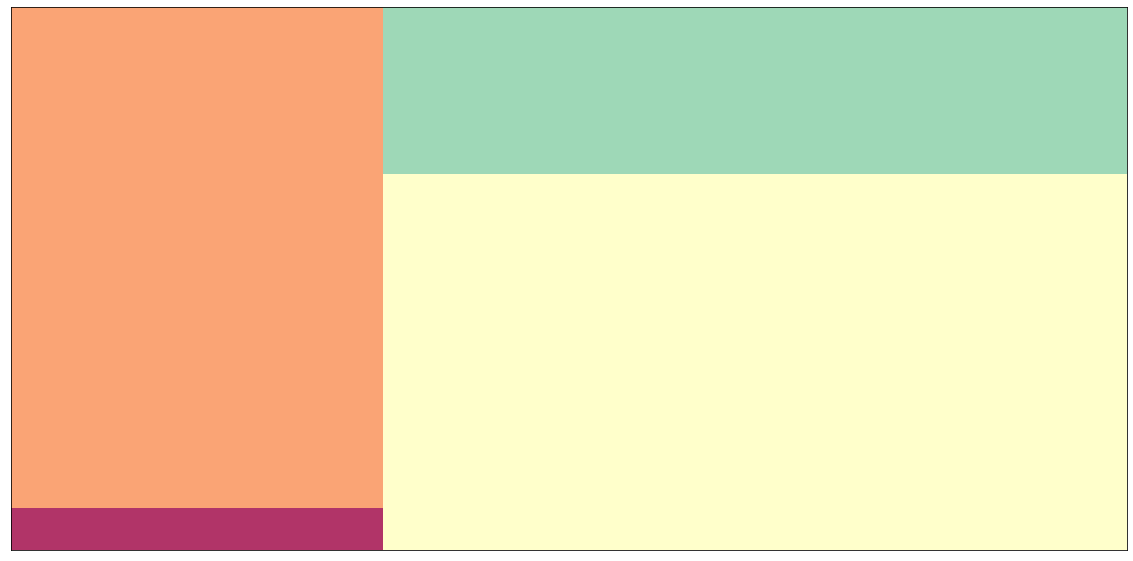

In [823]:
fig = plt.figure(figsize=((15, 15)))
label_value = gbdata3["per"].to_dict()

# create the labels using a list comprehesion
labels = ["{}占比{:.2f}%".format(class_, obs*100) for class_, obs in label_value.items()]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (20, 10))

# ----------------------------------------------------------------------------------------------------
# plot the data using squarify
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add a title to the plot
plt.savefig("第一问超标的指标.png", dpi=300)

In [827]:
import folium
Map = folium.Map(location=[38.46, 106.26], zoom_start=12, tiles="Stamen Terrain")
Map

In [828]:
space = pd.read_excel("空间模态.xlsx", header=None, names=total_df.columns[:2])
space.head()

,溶解氧,高锰酸盐指数
0,-0.754962,-0.324077
1,-0.215168,-0.504679
2,0.224525,-0.009094
3,0.206430,0.799184
4,0.539176,0.038666


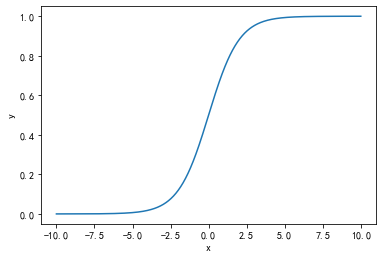

In [832]:
a = np.linspace(-10, 10, 1000)
b = 1.0 / (1.0 + np.exp(-a))
c = b * (1 - b)
plt.plot(a, b)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("logistics.png", dpi=300)

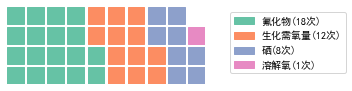

In [847]:
from pywaffle import Waffle
data = {'氟化物(18次)':18,'生化需氧量(12次)':12, '硒(8次)':8, '溶解氧(1次)':1}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=4, 
    values=data,
    figsize=(5, 3),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.savefig("超标次数频数统计图.png", dpi=300)

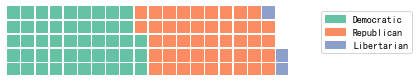

In [836]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

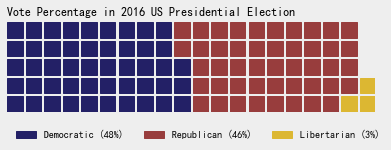

In [840]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#232066", "#983D3D", "#DCB732"],
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    block_arranging_style='snake'
)
fig.set_facecolor('#EEEEEE')
plt.show()

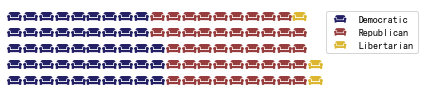

In [849]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#232066", "#983D3D", "#DCB732"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='couch', 
    font_size=12, 
    icon_legend=True
)
plt.show()

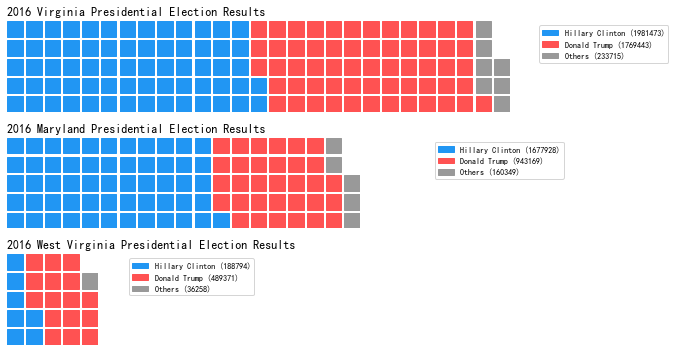

In [846]:
data = pd.DataFrame(
    {
        'labels': ['Hillary Clinton', 'Donald Trump', 'Others'],
        'Virginia': [1981473, 1769443, 233715],
        'Maryland': [1677928, 943169, 160349],
        'West Virginia': [188794, 489371, 36258],
    },
).set_index('labels')

# A glance of the data:
#                  Maryland  Virginia  West Virginia
# labels                                            
# Hillary Clinton   1677928   1981473         188794
# Donald Trump       943169   1769443         489371
# Others             160349    233715          36258


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': data['Virginia'] / 30000,
            'labels': [f"{k} ({v})" for k, v in data['Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2016 Virginia Presidential Election Results', 'loc': 'left'}
        },
        '312': {
            'values': data['Maryland'] / 30000,
            'labels': [f"{k} ({v})" for k, v in data['Maryland'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': '2016 Maryland Presidential Election Results', 'loc': 'left'}
        },
        '313': {
            'values': data['West Virginia'] / 30000,
            'labels': [f"{k} ({v})" for k, v in data['West Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': '2016 West Virginia Presidential Election Results', 'loc': 'left'}
        },
    },
    rows=5,  # outside parameter applied to all subplots
    colors=["#2196f3", "#ff5252", "#999999"],  # outside parameter applied to all subplots
    figsize=(9, 5)
)
plt.show()